In [ ]:
import nltk
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import time
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Load the emails dataset
emails = pd.read_csv("/content/sample_data/combined_data.csv")
emails.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
emails.shape

(83448, 2)

In [ ]:
 # keeping a subset of emails
emails= emails.sample(n=50000, random_state=42)


In [ ]:
emails.label.value_counts()

,count
label,
1,26308
0,23692


In [ ]:
emails.isnull().sum()

,0
label,0
text,0


In [ ]:
# Emails Preprocessing

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess each email
def preprocess_email(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the preprocessing to all emails
email_data = [preprocess_email(email) for email in emails.text]

# Use TfidfVectorizer to convert emails into numerical format
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(email_data)


In [ ]:
X.shape

(50000, 213302)

In [ ]:
# feature selection using chi square
# Select the top 10,000 best features
selector = SelectKBest(chi2, k=10000)
X_reduced = selector.fit_transform(X, emails.label)
X_reduced.shape

(50000, 10000)

In [ ]:
# Get the original feature names from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the indices of the selected features (Chi2 best features)
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features using the indices
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Create a DataFrame with the reduced features
tfidf_reduced_df = pd.DataFrame(X_reduced.toarray(), columns=selected_feature_names)

# Display the DataFrame
tfidf_reduced_df.head()


,aaa,aac,abacha,abacustech,abartlet,abated,abating,abb,abbott,abbotts,...,zoo,ztop,zu,zufferli,zugaenglichen,zukunft,zum,zwei,zyban,zybescapenumbern
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_reduced_df.shape

(50000, 10000)

In [ ]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_reduced_df, emails.label, test_size=0.3, random_state=42)

### **Spam Emails Classification using Logistic Regression**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
log_reg = LogisticRegression(solver='liblinear')
# Measure the time to fit the model
start_time = time.time()
log_reg.fit(X_train, y_train)
# Measure the time after fitting the model
end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time to fit the LogisticRegressio model: {execution_time:.4f} seconds")

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Execution time to fit the LogisticRegressio model: 5.2372 seconds
Accuracy: 0.9793
Precision: 0.9703
Recall: 0.9913
F1 Score: 0.9807


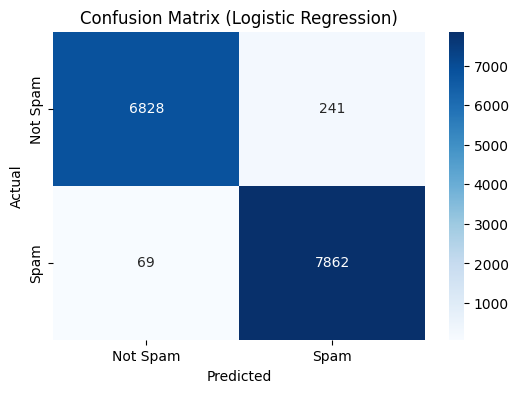

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

### **Spam Emails Classification using Multinomial Naive Bayes**

In [ ]:
nb_model = MultinomialNB()
# Measure the time to fit the model
start_time = time.time()
nb_model.fit(X_train, y_train)
# Measure the time after fitting the model
end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time to fit the MultinomialNB model: {execution_time:.4f} seconds")

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Execution time to fit the MultinomialNB model: 2.0824 seconds
Accuracy: 0.9709
Precision: 0.9815
Recall: 0.9631
F1 Score: 0.9722


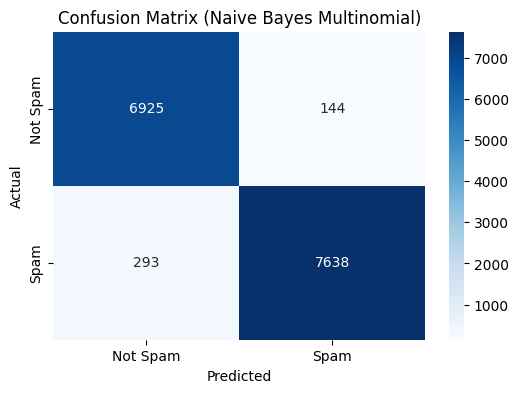

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes Multinomial)')
plt.show()

### **Spam Emails Classification using Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
# Measure the time to fit the model
start_time = time.time()
dt_model.fit(X_train, y_train)

# Measure the time after fitting the model
end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time to fit the model: {execution_time:.4f} seconds")

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Execution time to fit the model: 721.5733 seconds
Accuracy: 0.9610
Precision: 0.9629
Recall: 0.9633
F1 Score: 0.9631


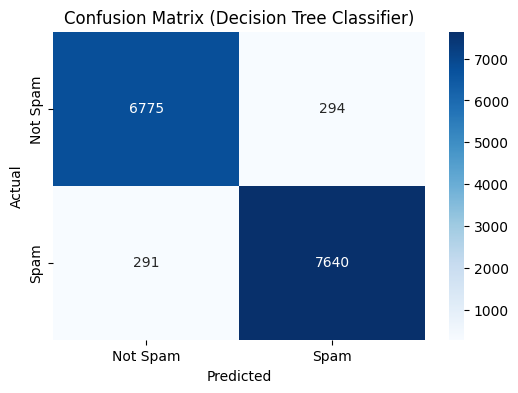

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()

### **Report**

**Dataset**

Emails dataset contains **83448** examples each labelled as **spam** or **ham**, collected from Kaggle. After preprocessing and converting each email to its tfidf values when i tried to split data into training and testing sets, colab enviornment collapsed. I observed similar behaviour when i ran it on local environment using miniconda. To avoid it i had to use a subset of the original dataset (50,000 examples).
        
        	       count
          label
             1 	26308
             0 	23692

             1: Spam, 0: Ham

Can you please guide me, how to handle larger dataset?



**Feature Selection**

After preprocessing and coverting words (emails) to their tfidf values, the total number of features were **2,13,302** which were reduced to 10,000 using **chi2**





**Models Evaluation**

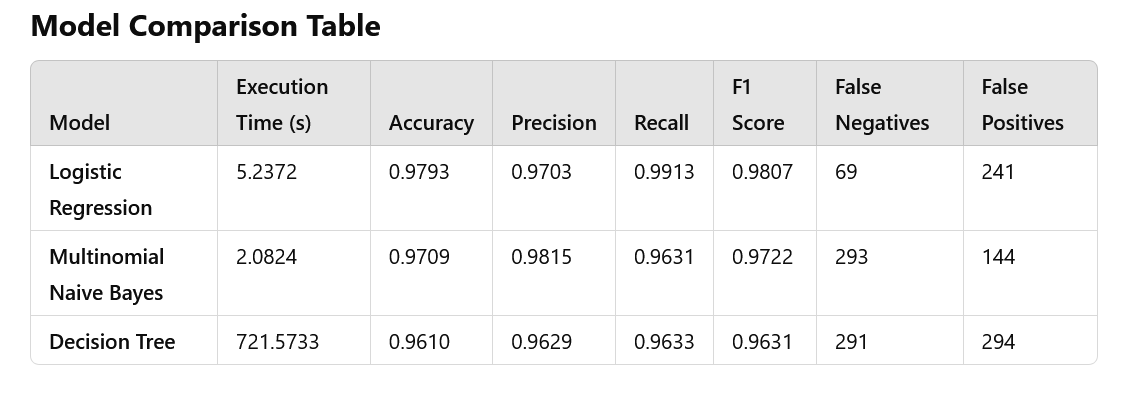

---
**Logistic Regression**

1. It has highest precision of 97.93% among all other classifiers.
2. Those emails which were classified as spam, 97.03% of them are actually spam.
3. Out of all spam emails, model successfully predicts 99.13% of them as spam

 **Error Rate**
 1. False Negatives (69): Only 69 spam emails were misclassified as non-spam.
 2. False Positives (241): 241 legitimate emails were incorrectly marked as spam.


---





**Multinomial Naive Bayes**

1. Its accuracy (97.09%) is slightly less than Logistic Regression but still higher than Decision Tree
2. Its precision (98.15%) is higher than other models. Emails which were classified as spam, 98.15% of them are actually spam.
3. The model identifies 96.31% of all spam emails.

 **Error Rate**
 1. False Negatives (293): More spam emails (293) are misclassified as non-spam compared to Logistic Regression.
 2. False Positives (144): Fewer legitimate emails are incorrectly marked as spam.


---



**Decision Tree**

1. It's accuracy(96.10%) is lowest among other models.
2. Those emails which were classified as spam, 96.29% of them are actually spam.
2. Out of all spam emails, model successfully predicts 96.33% of them as spam

 **Error Rate**
 1. False Negatives (291): More than Logistic Regression but slightly less than Navie Bayes Multinomial emails misclassified as non-spam
 2. False Positives (294): Highest number of legitimate emails misclassified as spam.


---

